# Model Training

Now that we have the data required to train this model lets build our Neural Network.  To help streamline this process I will use [TensorFlow](https://www.tensorflow.org/tutorials/keras/regression) with the Keras library.  It should be noted that this library is dependent on the `02_feature_engineering.ipynb` notebook.


In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt


## Split Train and Test Data

Let's split the data into a training and testing data set.  We will do a 90% train and 10% test split.

In [71]:
#
# Load the data that came out of the feature engineering notebook
player_stats = pd.read_csv('../tmp/02/player_stats_points.csv')

#
# Remove the name column since it is not needed for training
player_stats = player_stats.drop(['name'], axis=1)


#
# Split the x and y data sets.  The x will contain all player stats features which is before the last column.  The y will contain the players fantasy points from the week.  This value is stored in the last column.
x_data = player_stats.iloc[:, :-1]
y_data = player_stats[['points']]

#
# Split the data into training and testing data sets.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, shuffle=True, random_state=42) 


## Model Building

Now that all the prep work is done lets build and train the model!  I will be using a Neural Network to help predict a player's fantasy football points based on the average points scored per game from previous weeks.  

I am going to initially start with the following characteristics then go from there to tune to help make a more accurate model.
* 1 input Layer with 78 features
* 3 hidden layers with 78, 32 and 16 nodes.  
* 1 output layer with one node that represents the fantasy points.
* RELU activation for each layer
* Standard scaler for data normalization
* Adam optimizer
* Mean square error loss function

TensorFlow version: 2.18.0
Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - loss: 236.0737 - mae: 12.3024
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - loss: 173.1303 - mae: 10.5574
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 491us/step - loss: 127.8970 - mae: 8.6822 
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - loss: 61.6784 - mae: 6.3299
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 467us/step - loss: 56.6741 - mae: 6.1989
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 407us/step - loss: 58.9989 - mae: 6.2105
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - loss: 50.0591 - mae: 5.8477
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - loss: 59.3562 - mae: 6.3444
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - loss: 50.4541 - mae: 5.6943
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 57.1043 - mae: 6.1426
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 47.5588 - mae: 5.4435
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 

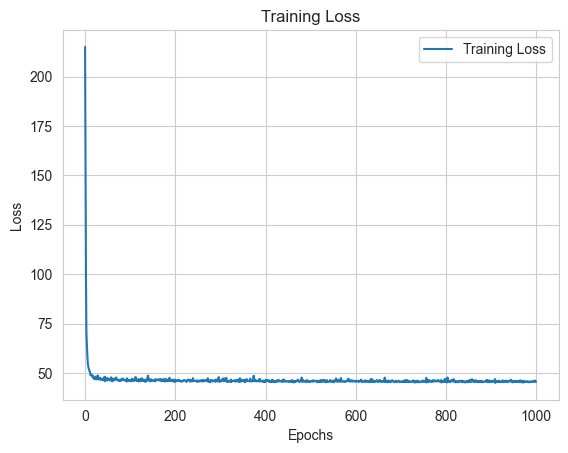

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 37.0502 - mae: 4.4149
Test MAE: 4.414917945861816


In [72]:
print("TensorFlow version:", tf.__version__)

scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(78, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=1000, batch_size=8, verbose=1)

train_loss = history.history['loss']  # Training loss

# Plot the loss curves
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")







## Use Test Data

Now that we have a model lets check it against the test data using various performance metrics

In [73]:
# Make predictions
predictions = model.predict(X_test)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# R-squared (R²)
r2 = r2_score(y_test, predictions)
print(f"R-squared (R²): {r2}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Mean Absolute Error (MAE): 4.414918416659036
Mean Squared Error (MSE): 37.0502057218576
Root Mean Squared Error (RMSE): 6.086888016208086
R-squared (R²): 0.5947180986404419


/Users/achester/Repos/DSC/412/Project/DSC412-project-amcheste/venv/lib/python3.12/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## More Models...

Okay based on the above the model is okay but lets see if we can make it better.  At this point I am going to just experiment and see if I can make it better and imporve things before the final submission.  At this point I atleast have a pretty good foundation that can be iterated on.

In [74]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(78, activation='relu'),
    layers.Dense(32, activation='swish'),
    layers.Dense(16, activation='swish'),
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=1000, batch_size=8, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 598us/step - loss: 203.9930 - mae: 10.9726
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - loss: 157.9139 - mae: 9.5240
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 137.7274 - mae: 8.8807
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 509us/step - loss: 70.4156 - mae: 6.5038
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 497us/step - loss: 63.1723 - mae: 6.6057
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 331us/step - loss: 56.4819 - mae: 6.2064
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - loss: 49.5894 - mae: 5.6474
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 339us/step - loss: 59.3765 - mae: 6.3560
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 359us/step - loss: 44.8172 - mae: 5.2526
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - loss: 46.6836 - mae: 5.6347
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 373us/step - loss: 51.8289 - mae: 5.7600
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 364us/step - loss: 47.3766

In [75]:
model = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(78, activation='relu'),
    layers.Dense(32, activation='swish'),
    layers.Dense(16, activation='swish'),
    layers.Dense(8, activation='swish'),
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

history = model.fit(X_train, y_train, epochs=1000, batch_size=8, verbose=1)

# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test)
print(f"Test MAE: {test_mae}")

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step - loss: 198.3457 - mae: 10.9702
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 150.0428 - mae: 9.0356
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 501us/step - loss: 89.1817 - mae: 7.6437
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - loss: 71.1583 - mae: 7.0085
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - loss: 62.1845 - mae: 6.2513
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - loss: 54.9395 - mae: 6.1090
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - loss: 51.8909 - mae: 5.7258
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 389us/step - loss: 58.9700 - mae: 6.2182
Epoch 9/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 43.3672 - mae: 5.0847
Epoch 10/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 375us/step - loss: 43.1541 - mae: 5.3530
Epoch 11/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 370us/step - loss: 43.3332 - mae: 5.3668
Epoch 12/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 332us/step - loss: 52.7051 